In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


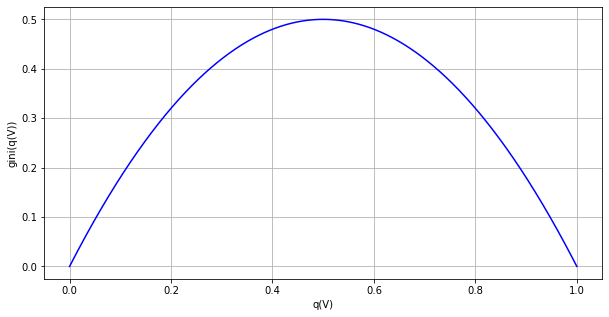

In [2]:
qv = np.linspace(0,1,1000)
gini = np.multiply(2,np.multiply(qv,(1-qv)))

plt.plot(qv,gini,'b')
plt.xlabel('q(V)')
plt.ylabel('gini(q(V))')
plt.grid(b=True)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

<ipython-input-3-e5ad720a2dc5>:1: RuntimeWarning: divide by zero encountered in log2
  H = -((qv*np.log2(qv)) + (1-qv)*np.log2(1-qv))
<ipython-input-3-e5ad720a2dc5>:1: RuntimeWarning: invalid value encountered in multiply
  H = -((qv*np.log2(qv)) + (1-qv)*np.log2(1-qv))


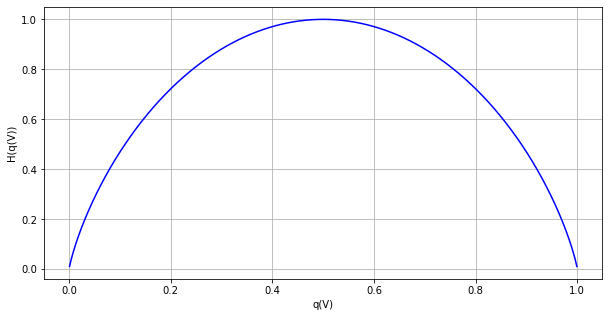

In [3]:
H = -((qv*np.log2(qv)) + (1-qv)*np.log2(1-qv))

plt.plot(qv,H,'b')
plt.xlabel('q(V)')
plt.ylabel('H(q(V))')
plt.grid(b=True)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [4]:
train_X = pd.read_csv(filepath_or_buffer='dataTraining_X.csv',header=None,names=['x1','x2','x3','x4','x5','x6'])
train_Y = pd.read_csv(filepath_or_buffer='dataTraining_Y.csv',header=None,names = ['y'])
test_X = pd.read_csv(filepath_or_buffer='dataTesting_X.csv',header=None,names=['x1','x2','x3','x4','x5','x6'])
test_Y = pd.read_csv(filepath_or_buffer='dataTesting_Y.csv',header=None, names = ['y'])

In [5]:
majority_class = train_Y['y'].value_counts().argmax()
train_Y_pred = majority_class*np.ones(train_Y.shape[0])
train_Y_true = train_Y['y'].values
test_Y_pred = majority_class*np.ones(test_Y.shape[0])
test_Y_true = test_Y['y'].values
training_accuracy = accuracy_score(train_Y_true,train_Y_pred)
testing_accuracy = accuracy_score(test_Y_true,test_Y_pred)
print('Baseline: Training Accuracy = {0:.4f} and Testing Accuracy = {1:.4f}'.format(training_accuracy,testing_accuracy))

Baseline: Training Accuracy = 0.5944 and Testing Accuracy = 0.6949


In [6]:
train_Y['y'].value_counts()

0    422
1    288
Name: y, dtype: int64

In [7]:
test_Y['y'].value_counts()

0    123
1     54
Name: y, dtype: int64

In [8]:
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(train_X,train_Y)
train_Y_pred_dt = clf.predict(train_X)
test_Y_pred_dt = clf.predict(test_X)
train_acc_dt = accuracy_score(train_Y_true,train_Y_pred_dt)
test_acc_dt = accuracy_score(test_Y_true,test_Y_pred_dt)
print('Decision Tree: Training Accuracy = {0:.4f} and Testing Accuracy = {1:.4f}'.format(train_acc_dt,test_acc_dt))

Decision Tree: Training Accuracy = 0.9817 and Testing Accuracy = 0.7966


In [9]:
tree_depth = clf.get_depth()
print('Tree Depth = {}'.format(tree_depth))

Tree Depth = 30


In [10]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
dot_data = tree.export_graphviz(clf, out_file=None,filled=True, rounded=True,special_characters=False)  
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render('Decision_tree')

'Decision_tree.png'

In [11]:
dot_data = tree.export_graphviz(clf, out_file=None,filled=True, rounded=True,special_characters=False,max_depth=3)  
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render('Decision_tree_zoom')

'Decision_tree_zoom.png'